<a href="https://colab.research.google.com/github/yashfirkedata/DL-Patient-Survival-Prediction/blob/main/patient_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv("/content/drive/MyDrive/Datasets/Patient Survival Detection/Dataset.csv")
raw_data

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [3]:
raw_data.shape

(91713, 186)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [5]:
raw_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    encounter_id                   int64  
 1    patient_id                     int64  
 2    hospital_id                    int64  
 3    hospital_death                 int64  
 4    age                            float64
 5    bmi                            float64
 6    elective_surgery               int64  
 7    ethnicity                      object 
 8    gender                         object 
 9    height                         float64
 10   hospital_admit_source          object 
 11   icu_admit_source               object 
 12   icu_id                         int64  
 13   icu_stay_type                  object 
 14   icu_type                       object 
 15   pre_icu_los_days               float64
 16   readmission_status             int64  
 17   weight                       

In [6]:
raw_data.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
raw_data.duplicated().any()

False

In [8]:
null_list = raw_data.isnull().sum().sort_values(ascending=False)
pd.set_option('display.max_rows', len(null_list))
null_list

h1_bilirubin_min                 84619
h1_bilirubin_max                 84619
h1_lactate_max                   84369
h1_lactate_min                   84369
h1_albumin_max                   83824
h1_albumin_min                   83824
h1_pao2fio2ratio_min             80195
h1_pao2fio2ratio_max             80195
h1_arterial_ph_max               76424
h1_arterial_ph_min               76424
h1_hco3_max                      76094
h1_hco3_min                      76094
h1_arterial_pco2_min             75959
h1_arterial_pco2_max             75959
h1_wbc_max                       75953
h1_wbc_min                       75953
h1_arterial_po2_max              75945
h1_arterial_po2_min              75945
h1_calcium_max                   75863
h1_calcium_min                   75863
h1_platelets_max                 75673
h1_platelets_min                 75673
h1_bun_max                       75091
h1_bun_min                       75091
h1_creatinine_max                74957
h1_creatinine_min        

**Columns we can drop:** 'encounter_id', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'patient_id', 'hospital_id', 'readmission_status'

We can observe that there are alot of columns with missing values.
So looking at the missing values there is leap from wec_apache with 22012
missing values to urineoutput_apache with 48998 missing values. So we can set
some **threshold of 22013** such that all columns with missing values greater than
22013 will be dropped.

In [9]:
print("Number of rows with missing values:", raw_data.isnull().any(axis=1).sum())

Number of rows with missing values: 91688


In [10]:
large_missing = null_list[raw_data.isnull().sum() > 22013]

print("\nTotal features with more than", 22013, "missing values:", len(large_missing))

raw_data.drop(large_missing.index.tolist() + ['encounter_id', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'patient_id', 'hospital_id', 'readmission_status'],
              axis=1,
             inplace = True)
raw_data


Total features with more than 22013 missing values: 74


,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_type,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730000,0,Caucasian,M,180.3,CTICU,0.541667,73.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420000,0,Caucasian,F,160.0,Med-Surg ICU,0.927778,70.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950000,0,Caucasian,F,172.7,Med-Surg ICU,0.000694,95.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640000,1,Caucasian,F,165.1,CTICU,0.000694,61.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,Med-Surg ICU,0.073611,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.0,23.060250,0,Caucasian,M,177.8,Cardiac ICU,0.298611,72.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,0,56.0,47.179671,0,Caucasian,F,183.0,Med-Surg ICU,0.120139,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,0,48.0,27.236914,0,Caucasian,M,170.2,Med-Surg ICU,0.046528,78.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,0,NaN,23.297481,0,Caucasian,F,154.9,Med-Surg ICU,0.081944,55.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [11]:
# previously it was (91713, 186)
raw_data.shape

(91713, 104)

In [12]:
raw_data.nunique()

hospital_death                       2
age                                 74
bmi                              34888
elective_surgery                     2
ethnicity                            6
gender                               2
height                             401
icu_type                             8
pre_icu_los_days                  9757
weight                            3409
apache_2_diagnosis                  44
apache_3j_diagnosis                399
apache_post_operative                2
arf_apache                           2
bun_apache                         476
creatinine_apache                 1127
gcs_eyes_apache                      4
gcs_motor_apache                     6
gcs_unable_apache                    2
gcs_verbal_apache                    5
glucose_apache                     565
heart_rate_apache                  149
hematocrit_apache                  353
intubated_apache                     2
map_apache                         161
resprate_apache          

In [13]:
raw_data.isna().sum()

hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
icu_type                             0
pre_icu_los_days                     0
weight                            2720
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bun_apache                       19262
creatinine_apache                18853
gcs_eyes_apache                   1901
gcs_motor_apache                  1901
gcs_unable_apache                 1037
gcs_verbal_apache                 1901
glucose_apache                   11036
heart_rate_apache                  878
hematocrit_apache                19878
intubated_apache                   715
map_apache                         994
resprate_apache          

 *bmi, weight and height* are some of the related columns so we can remove rows with missing values in all 3



In [14]:
print("Shape before removing missing values:", raw_data.shape)
raw_data = raw_data[raw_data[['bmi', 'weight', 'height']].isna().sum(axis=1) == 0]
# After this operation, raw_data will only include rows where the columns 'bmi', 'weight', and 'height' all have non-NaN values.
print("Shape before removing missing values:", raw_data.shape)

Shape before removing missing values: (91713, 104)
Shape before removing missing values: (88284, 104)


# **Univariate and Multivariate Data Analysis**

As the dataset is large, we cannot plot individual plots.

We will look into independent columns.



We will see death-rate for male/female patients

In [15]:
import plotly.express as px
fig = px.histogram(raw_data[['age','gender','hospital_death','bmi']].dropna(), x="age", y="hospital_death", color="gender",
                   marginal="box", # or violin, rug
)
fig.show()

**Observations**:
* We can clearly see female deaths are higher than males.
* First person to die was a female at age 16.

**# We can check no of deaths of male/female per age**

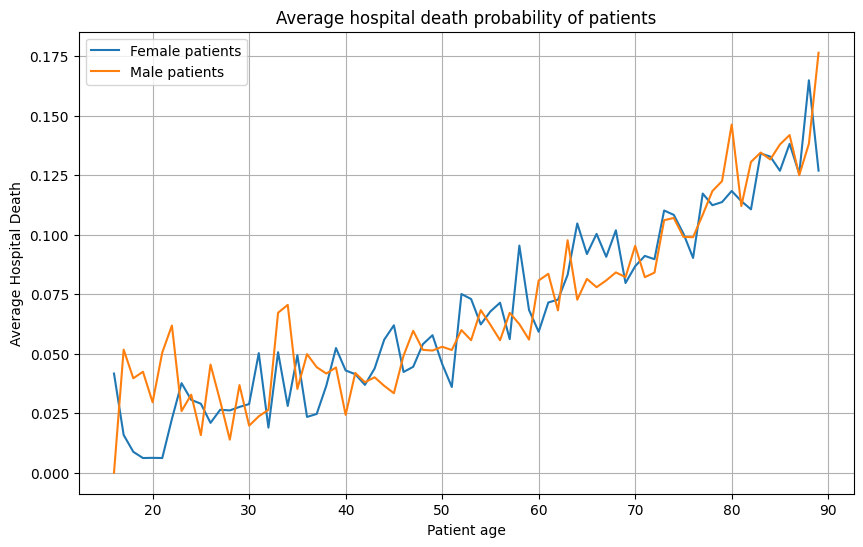

In [16]:

age_death_F = raw_data[raw_data['gender'] == 'F'][['age', 'hospital_death']].groupby('age').mean().reset_index()
age_death_M = raw_data[raw_data['gender'] == 'M'][['age', 'hospital_death']].groupby('age').mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(age_death_F['age'], age_death_F['hospital_death'], label="Female patients")
plt.plot(age_death_M['age'], age_death_M['hospital_death'], label="Male patients")
plt.title("Average hospital death probability of patients")
plt.xlabel("Patient age")
plt.ylabel("Average Hospital Death")
plt.legend()
plt.grid(True)
plt.show()

The above graph tells what is probablity of a male/female to die at a certain age.

It can be seen easily that older population have higher risk of dying.

**# Impact of BMI and weight over patients.**

<ipython-input-17-383337f533c9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-383337f533c9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



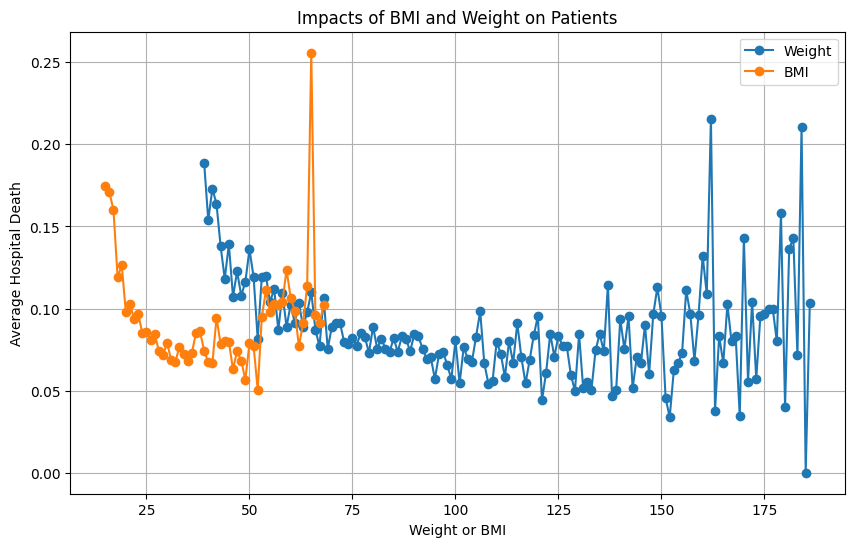

In [17]:
weight_df = raw_data[['weight', 'hospital_death', 'bmi']]
weight_df['weight'] = weight_df['weight'].round(0)
weight_df['bmi'] = weight_df['bmi'].round(0)

# Group by 'weight' and 'bmi' and calculate the mean of 'hospital_death'
weight_death = weight_df[['weight', 'hospital_death']].groupby('weight').mean().reset_index()
bmi_death = weight_df[['bmi', 'hospital_death']].groupby('bmi').mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weight_death['weight'], weight_death['hospital_death'], label="Weight", marker='o')
plt.plot(bmi_death['bmi'], bmi_death['hospital_death'], label="BMI", marker='o')
plt.title("Impacts of BMI and Weight on Patients")
plt.xlabel("Weight or BMI")
plt.ylabel("Average Hospital Death")
plt.legend()
plt.grid(True)
plt.show()

# **Preprocessing**

In [18]:
raw_data.dtypes

hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
icu_type                          object
pre_icu_los_days                 float64
weight                           float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bun_apache                       float64
creatinine_apache                float64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                float64
gcs_verbal_apache                float64
glucose_apache                   float64
heart_rate_apache                float64
hematocrit_apache                float64
intubated_apache                 float64
map_apache      

In [19]:
raw_data.select_dtypes(include='O').columns.values.tolist()

['ethnicity',
 'gender',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [20]:
# these are categorical columns but represented by numerics
numerical_categorical_cols = [
 'elective_surgery',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

# these are catgotical colmns with dtype = object
categorical_cols = ['ethnicity',
 'gender',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [21]:
non_numerical_cols = raw_data[numerical_categorical_cols + categorical_cols + ['hospital_death']].columns.tolist()
numeric_only = raw_data.drop(non_numerical_cols,axis=1).columns.tolist()
numeric_only

['age',
 'bmi',
 'height',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_re

In [22]:
for col in numerical_categorical_cols:
    raw_data[col] = raw_data[col].astype('Int64')

for col in numerical_categorical_cols:
    raw_data[col] = raw_data[col].fillna(raw_data[col].mode()[0])

<ipython-input-22-0a891654bfc8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-0a891654bfc8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-0a891654bfc8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-0a89165

In [23]:
raw_data[numeric_only].isna().sum(axis=0).sort_values(ascending=False)

wbc_apache                       21063
h1_temp_max                      20833
h1_temp_min                      20833
hematocrit_apache                19005
bun_apache                       18289
creatinine_apache                17926
sodium_apache                    17644
d1_hco3_max                      14390
d1_hco3_min                      14390
d1_platelets_min                 12767
d1_platelets_max                 12767
d1_wbc_max                       12501
d1_wbc_min                       12501
d1_calcium_min                   12315
d1_calcium_max                   12315
d1_hemaglobin_max                11519
d1_hemaglobin_min                11519
d1_hematocrit_max                11051
d1_hematocrit_min                11051
glucose_apache                   10473
d1_bun_min                        9860
d1_bun_max                        9860
d1_creatinine_min                 9561
d1_creatinine_max                 9561
d1_sodium_max                     9554
d1_sodium_min            

In [24]:
# We will set a threshold such that below 11000 misssing values, we will use mean to impute missign values
above_11K = raw_data[numeric_only].isna().sum(axis=0).sort_values()[raw_data[numeric_only].isna().sum(axis=0) < 11000].index.tolist()
below_11K = split_two = raw_data[numeric_only].isna().sum(axis=0).sort_values()[raw_data[numeric_only].isna().sum(axis=0) > 11000].index.tolist()

In [25]:
for col in below_11K:
    raw_data[col] = raw_data[col].fillna(raw_data[col].mean())

# dropping above 11K missing values data
process_data = raw_data.dropna(axis=0)

<ipython-input-25-3df6e320dc5d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
process_data[categorical_cols].nunique()

ethnicity                6
gender                   2
icu_type                 8
apache_3j_bodysystem    11
apache_2_bodysystem     10
dtype: int64

**OneHotEncoding the categorical columns**

Note: This is just practice project so I am not considering the problem of data leakage. Generally you are supposed to perform Encoding after train test split in order to not leak any information in the test set.


In [29]:
icu_data = pd.get_dummies(process_data,
    prefix='isin',
    prefix_sep='_',
    columns=categorical_cols,
    drop_first=False)
icu_data.reset_index(drop = True, inplace = True)
icu_data

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,isin_Cardiovascular,isin_Gastrointestinal,isin_Haematologic,isin_Metabolic,isin_Neurologic,isin_Renal/Genitourinary,isin_Respiratory,isin_Trauma,isin_Undefined Diagnoses,isin_Undefined diagnoses
0,0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,...,True,False,False,False,False,False,False,False,False,False
1,0,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,...,False,False,False,False,False,False,True,False,False,False
2,0,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,...,False,False,False,False,True,False,False,False,False,False
3,0,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0,...,False,False,False,False,False,False,True,False,False,False
4,0,87.0,21.963763,0,180.3,5.046528,71.4,113.0,501.05,0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53108,0,47.0,51.439842,1,195.0,0.033333,186.0,304.0,1406.01,1,...,False,True,False,False,False,False,False,False,False,False
53109,0,54.0,19.770448,0,177.8,0.025694,62.5,109.0,108.01,0,...,True,False,False,False,False,False,False,False,False,False
53110,0,75.0,23.060250,0,177.8,0.298611,72.9,113.0,501.06,0,...,True,False,False,False,False,False,False,False,False,False
53111,0,56.0,47.179671,0,183.0,0.120139,158.0,113.0,501.05,0,...,True,False,False,False,False,False,False,False,False,False


In [30]:
icu_data.dtypes

hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   Int64
height                           float64
pre_icu_los_days                 float64
weight                           float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              Int64
arf_apache                         Int64
bun_apache                       float64
creatinine_apache                float64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                  Int64
gcs_verbal_apache                float64
glucose_apache                   float64
heart_rate_apache                float64
hematocrit_apache                float64
intubated_apache                   Int64
map_apache                       float64
resprate_apache                  float64
sodium_apache                    float64
temp_apache     

In [31]:
icu_data.to_csv('/content/drive/MyDrive/Datasets/psp_modelling_data.csv', index=False)